# Case Study Predicting Bike Sharing using Linear Regression

In [185]:
# Importing libraries

# To read the csv file
import pandas as pd

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Statistics model 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Other Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Skip warnings which can be ignored
import warnings as w
w.filterwarnings('ignore')

## Step 1. Reading, understanding provided data

In [186]:
# Reading the provided data in Pandas dataframe
bike_shre_df = pd.read_csv('day.csv')
bike_shre_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
# identify the structure of the dataframe ( number of rows and columns)
bike_shre_df.shape

(730, 16)

In [188]:
# Checking column metadata in dataframe
bike_shre_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [189]:
# Check the data type and other information of the columns

bike_shre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The above details provide the information there are no null values in any column and only dteday is the non numeric datatype

In [190]:
# Crosschecking if the null value are present
bike_shre_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [191]:
# Checking for unique values in the dataframe
bike_shre_df.nunique() 

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Only instant and dteday has the unique values as compared with shape() output

#### Other Analysis and inferences

1. The column 'instant' seems to be an indexed column and we already have indexed dataframe hence we can drop this column.
2. 'cnt' is the target variable which signifies total number of bikes rented.
3. As 'cnt' variable indicates the total number of bike rentals, including both casual and registered hence cannot be considered as features predicting/impacting the target variable.
4. In the dataset season, yr, mnth, holiday, weekday, workingday, weathersit predictors should be categorical type, but they are int64 hence they need categorical transformatin further.

In [192]:
# Based on above Analysis instant, dteday, casual and registered columns can be dropped
bike_shre_df = bike_shre_df.drop(columns = ['instant', 'dteday', 'casual', 'registered'])

In [193]:
# verifying after above columns are dropped
bike_shre_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2. EDA Analysis and Data Visualization

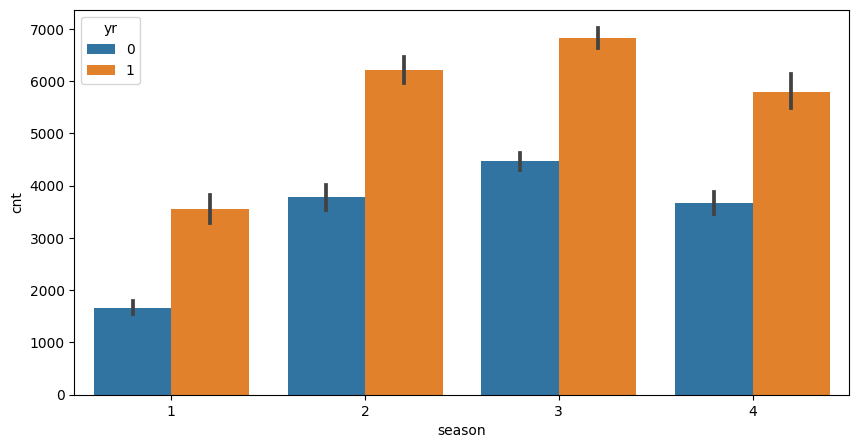

In [194]:
plt.figure(figsize = (10,5))
sns.barplot(x ='season',y ='cnt',data = bike_shre_df, hue='yr')
plt.show()

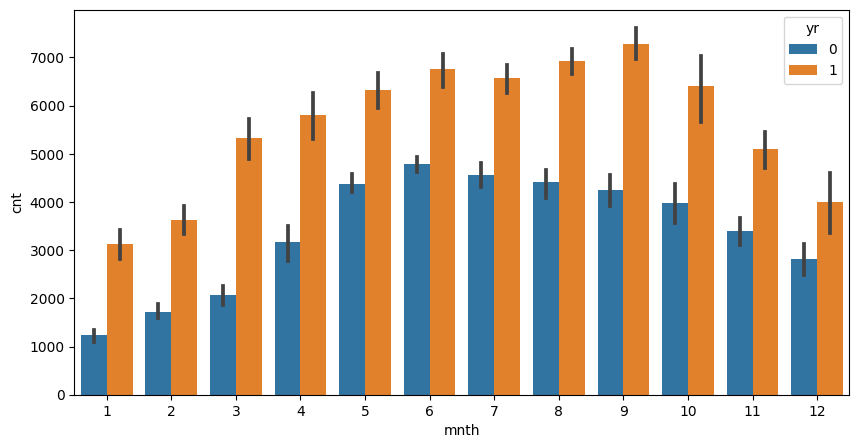

In [195]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'mnth',y = 'cnt',data=bike_shre_df, hue='yr')
plt.show()

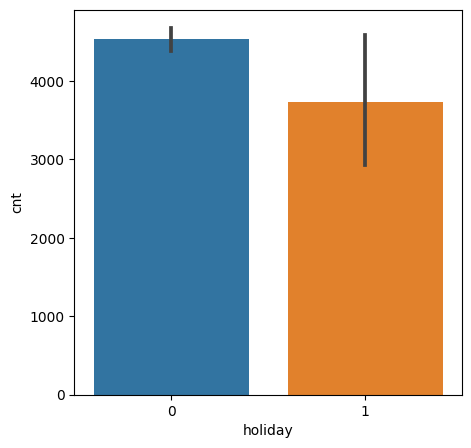

In [196]:
plt.figure(figsize = (5,5))
sns.barplot(x= "holiday",y= "cnt",data=bike_shre_df,)
plt.show()

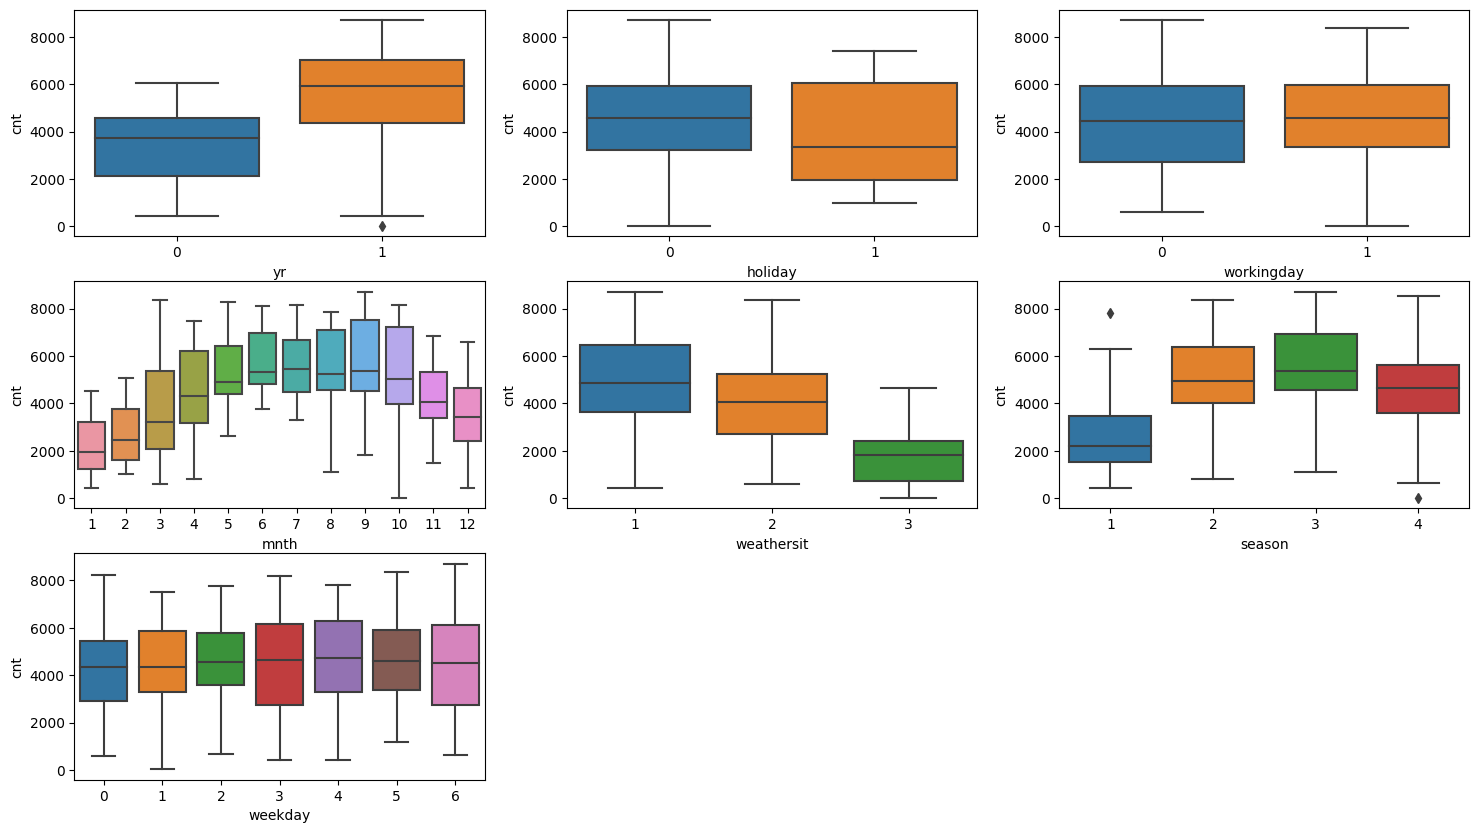

In [197]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_shre_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_shre_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_shre_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_shre_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_shre_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike_shre_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_shre_df)

plt.show()


#### Observation and Inferences:
1. The first graph shows Bike Rentals are more in 2019 than in 2018
2. The second graph and third conclude rentals were more in holiday than in working day
4. Bike rentals were high majorly from May to Octobe i.e. are more during the Fall season and then in summer and least in spring, with highest goes in september.
5. Bike Rentals are more in clear weather.
6. Bike Rentals are mostly uniform but least in Sunday
7. There are no Bike rentals on "Heavy Snow/Rain" weather.

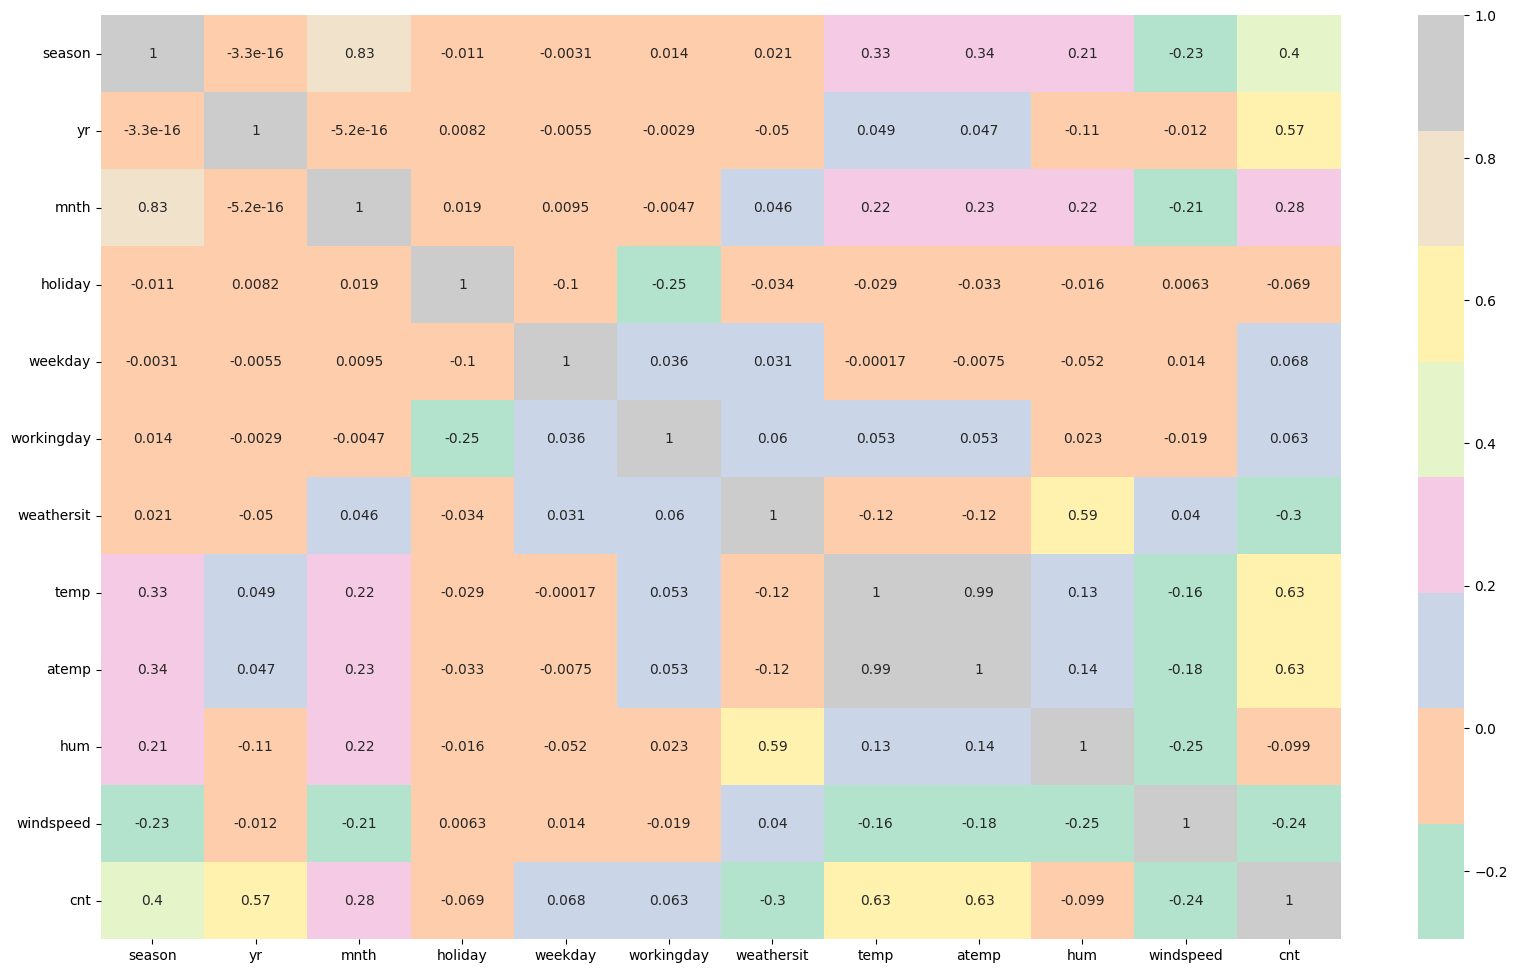

In [198]:
plt.figure(figsize = (20, 12))
sns.heatmap(bike_shre_df.corr(), annot = True, cmap = 'Pastel2')
plt.show()

#### Heatmap Analysis and Inference
1) 'cnt' has good correlation with yr( 0.57) , temp(0.63), atemp(0.63) follwed by yr(0.57)
2) 'season' and 'mnth' have good correlation with each other.
3) 'temp' and 'atemp' have very high correlation ( 0.99) with each other, which means either one can be removed from analysis.


In [199]:
# combining categorical and Numeric column in single variable for performing EDA
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [200]:
# Checking for mean and median values for the numerical columns
bike_shre_df[numeric_columns].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Outlier Conclusion:
* As seen the median and means for all numerical columns are close to each other hence outlier-handling is not required.

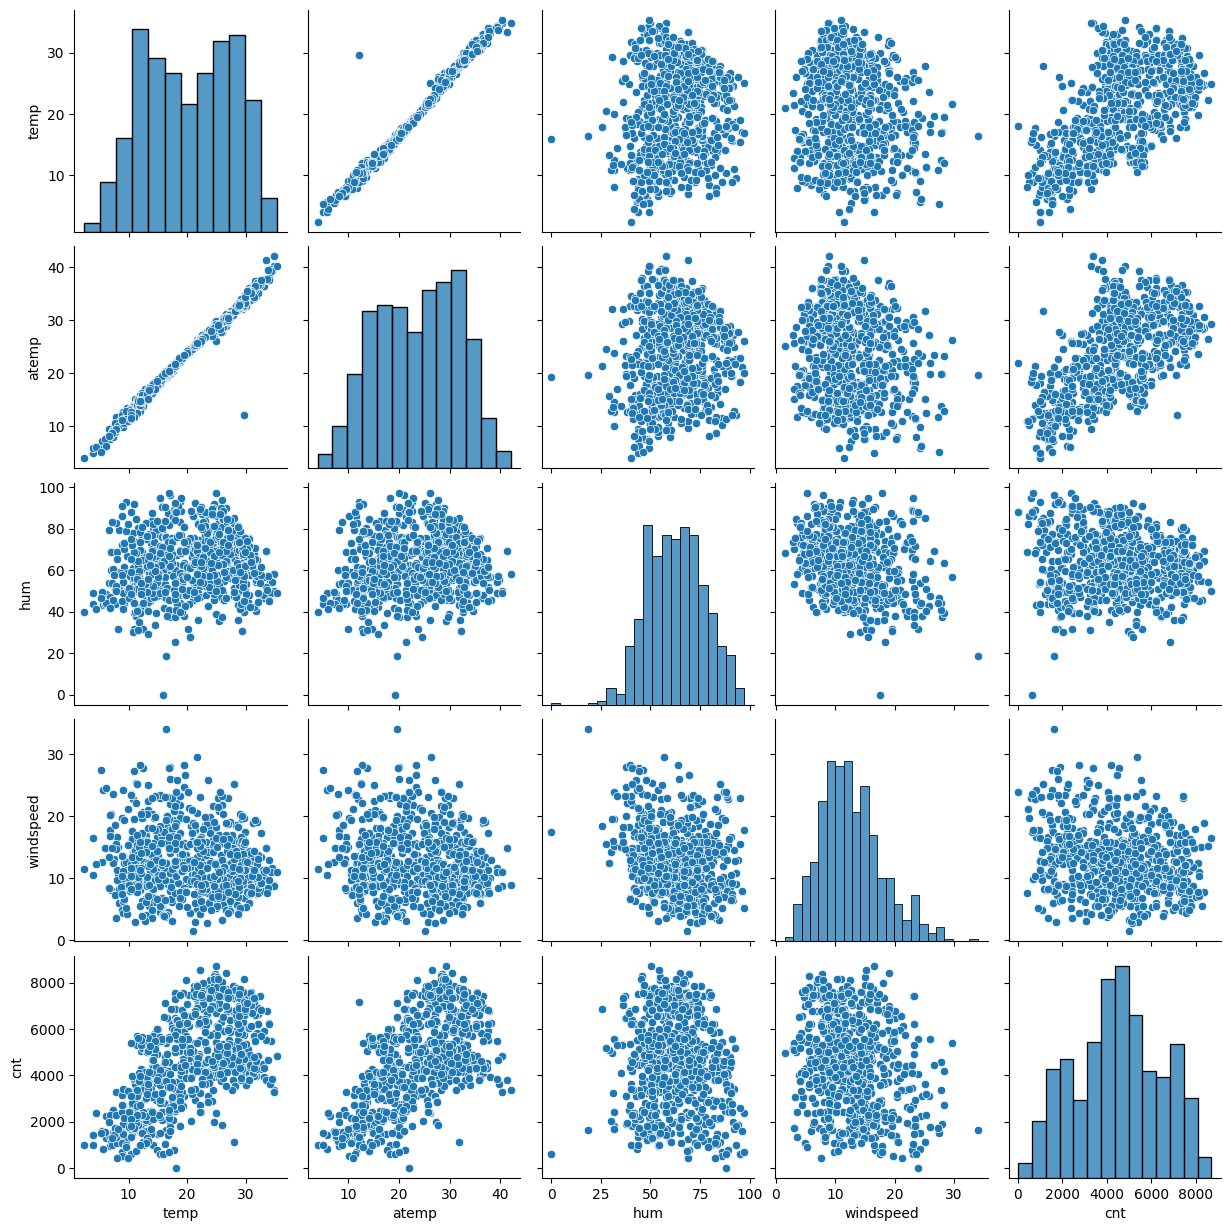

In [201]:
# using pair-plot to understand numeric values

sns.pairplot(data=bike_shre_df, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()


As observed using the heatmap and pairplots ,there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt and hence we can use Linear regression model.

## Step 3. Data Preparation + Dummy Variables Creation

#### Converting categorical columns which are integer in dataframe to categorical values as per data dictionary

In [202]:
bike_shre_df['season'].replace({
      1: 'spring', 
      2: 'summer',
      3: 'fall',
      4: 'winter'
}, inplace=True)

bike_shre_df['weathersit'].replace({
     1: 'Clear',
     2: 'Misty_Or_Cloudy',
     3: 'Light_Snow_Rain',
     4: 'Heavy_Snow_Rain'
}, inplace=True)


bike_shre_df['mnth'].replace({
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'aug',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'dec'
}, inplace=True)


bike_shre_df['weekday'].replace({
    0: 'sun',
    1: 'mon',
    2: 'tue',
    3: 'wed',
    4: 'thu',
    5: 'fri',
    6: 'sat'
}, inplace=True)

bike_shre_df['yr'].replace({
     0: 2018,
     1: 2019
 }, inplace=True)

In [203]:
# verifying after categorical columns which are integer in dataframe to categorical values 
bike_shre_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty_Or_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty_Or_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [204]:
# 'season', 'mnth', 'weekday', 'weathersit' are the categorical variables which need conversion to dummy variable
bike_dummy = bike_shre_df[['season','mnth','weekday', 'weathersit']]
bike_dummy = pd.get_dummies(bike_dummy,dtype='int' , drop_first=True )
# Adding the dummy variables to the original bike_shre_df dataframe
bike_shre_df = pd.concat([bike_dummy, bike_shre_df], axis = 1)

bike_shre_df.head()


,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,jan,0,sat,0,Misty_Or_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,jan,0,sun,0,Misty_Or_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [205]:
# we can now drop the original columns that we used to create the dummy variables
bike_shre_df.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

bike_shre_df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_Light_Snow_Rain,weathersit_Misty_Or_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,2018,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [206]:
bike_shre_df.shape

(730, 30)

In [207]:
bike_shre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_spring               730 non-null    int32  
 1   season_summer               730 non-null    int32  
 2   season_winter               730 non-null    int32  
 3   mnth_aug                    730 non-null    int32  
 4   mnth_dec                    730 non-null    int32  
 5   mnth_feb                    730 non-null    int32  
 6   mnth_jan                    730 non-null    int32  
 7   mnth_jul                    730 non-null    int32  
 8   mnth_jun                    730 non-null    int32  
 9   mnth_mar                    730 non-null    int32  
 10  mnth_may                    730 non-null    int32  
 11  mnth_nov                    730 non-null    int32  
 12  mnth_oct                    730 non-null    int32  
 13  mnth_sep                    730 non

## Step 4: Splitting data into Test and Training Set

In [208]:
# Train Test split with 70:30 ratio
# Assigning only the target variable to y
y = bike_shre_df.pop('cnt')

# Assigning the remaining variables to X
X = bike_shre_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [209]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [210]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season_spring               511 non-null    int32  
 1   season_summer               511 non-null    int32  
 2   season_winter               511 non-null    int32  
 3   mnth_aug                    511 non-null    int32  
 4   mnth_dec                    511 non-null    int32  
 5   mnth_feb                    511 non-null    int32  
 6   mnth_jan                    511 non-null    int32  
 7   mnth_jul                    511 non-null    int32  
 8   mnth_jun                    511 non-null    int32  
 9   mnth_mar                    511 non-null    int32  
 10  mnth_may                    511 non-null    int32  
 11  mnth_nov                    511 non-null    int32  
 12  mnth_oct                    511 non-null    int32  
 13  mnth_sep                    511 non-nu

In [211]:
# Apply minMaxScaler to the columns except the 'dummy' variables we created above
num_vars = ['temp', 'hum', 'windspeed','temp', 'atemp']
X_train[num_vars] = minMaxScaler.fit_transform(X_train[num_vars])

In [212]:
X_train.describe()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weekday_wed,weathersit_Light_Snow_Rain,weathersit_Misty_Or_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,...,0.140900,0.029354,0.346380,2018.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873
std,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,...,0.348259,0.168963,0.476282,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2019.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2019.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Building a Linear Regression Model

##### We would Use a mixed approach to build the model. where we would start with RFE (Recursive Feature Elimination) approach for feature selection and statsmodel approach for building the model

In [213]:
# Fitting the model on training data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [214]:
# Use RFE to start with 15 features
rfe = RFE(estimator = lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [215]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
# Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 14),
 ('mnth_jan', False, 10),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Misty_Or_Cloudy', False, 2),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [216]:
# Manual elimination
# Function to build a model using statsmodel api - Input is columns to be selected for model as a parameter

def build_model(cols):
    # Creating X_test dataframe with RFE selected variables
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [217]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_calc

def getVIF(cols):
    temp = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = temp.columns
    vif['VIF'] = [vif_calc(temp.values, i) for i in range(temp.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [218]:
# Print Columns selected by RFE. We will start with these columns for manual elimination
cols = X_train.columns[rfe.support_]
cols

Index(['season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_Snow_Rain',
       'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [219]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Misty_Or_Cloudy', 'temp'],
      dtype='object')

### Build Model 1 - Start with all variables selected by RFE

In [220]:
# Running the linear model
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          5.45e-183
Time:                        10:48:54   Log-Likelihood:                -4134.0
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     496   BIC:                             8362.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [221]:
# Checking VIF 
getVIF(cols)

                      Features          VIF
11                  workingday  11174564.33
7                  weekday_sun   2548608.90
6                  weekday_sat   2515935.21
10                     holiday    457461.99
12                       atemp         3.49
0                season_spring         2.86
1                season_winter         2.18
4                     mnth_nov         1.71
3                     mnth_jul         1.35
2                     mnth_dec         1.27
13                         hum         1.25
14                   windspeed         1.19
8   weathersit_Light_Snow_Rain         1.14
5                     mnth_sep         1.13
9                           yr         1.02


Removing the variables based on the priority 
1) remove all variables with High p-value, High VIF
2) second step would be to remove variables with High p-value, Low VIF
3) and lastly remove all variables with Low p-value, High VIF

In [222]:
#Build Model 2  Dropping the variable "workingday" as it has High VIF
cols = [ 'season_spring','season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_Snow_Rain',
       'yr', 'holiday',  'atemp', 'hum', 'windspeed']
        
build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          5.45e-183
Time:                        10:48:54   Log-Likelihood:                -4134.0
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     496   BIC:                             8362.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [223]:
getVIF(cols)

                      Features    VIF
9                           yr  70.05
12                         hum  26.96
11                       atemp  24.83
13                   windspeed   7.13
0                season_spring   3.71
1                season_winter   2.90
4                     mnth_nov   1.89
3                     mnth_jul   1.49
2                     mnth_dec   1.37
7                  weekday_sun   1.25
5                     mnth_sep   1.24
6                  weekday_sat   1.24
8   weathersit_Light_Snow_Rain   1.18
10                     holiday   1.06


In [224]:
# Build Model 4 - Dropping the variable "weekday_sat" as it has high  p value 
cols = [ 'season_spring','season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sep',  'weekday_sun', 'weathersit_Light_Snow_Rain',
       'yr', 'holiday',  'atemp', 'hum', 'windspeed']   
build_model(cols)
getVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.54e-184
Time:                        10:48:54   Log-Likelihood:                -4134.2
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     497   BIC:                             8356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [225]:
#Build Model 5 - Dropping the variable "hum" as it has negative coefficient(-2363.6506) and high VIF
cols = [ 'season_spring','season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov',
       'mnth_sep',  'weekday_sun', 'weathersit_Light_Snow_Rain',
       'yr', 'holiday',  'atemp',  'windspeed']      
build_model(cols)
getVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     176.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.01e-170
Time:                        10:48:54   Log-Likelihood:                -4169.3
No. Observations:                 511   AIC:                             8365.
Df Residuals:                     498   BIC:                             8420.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [226]:
#Build Model 6 - Dropping the variable "mnth_jul" as it has  high p-value (0.025)
cols = [ 'season_spring','season_winter', 'mnth_dec',  'mnth_nov',
       'mnth_sep',  'weekday_sun', 'weathersit_Light_Snow_Rain',
       'yr', 'holiday',  'atemp',  'windspeed']      
build_model(cols)
getVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.74e-170
Time:                        10:48:54   Log-Likelihood:                -4171.9
No. Observations:                 511   AIC:                             8368.
Df Residuals:                     499   BIC:                             8419.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [227]:
#Build Model 7 - Dropping the variable "yr" as it has  high VIF
cols = [ 'season_spring','season_winter', 'mnth_dec',  'mnth_nov',  'mnth_sep',  'weekday_sun', 'weathersit_Light_Snow_Rain', 'holiday',  'atemp',  'windspeed']         
build_model(cols)
getVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     60.08
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           3.16e-79
Time:                        10:48:54   Log-Likelihood:                -4391.0
No. Observations:                 511   AIC:                             8804.
Df Residuals:                     500   BIC:                             8851.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [228]:
#Build Model 8 - Adding back the variable "yr" as R2 value decreeases by 25 points approx

cols = [ 'season_spring','season_winter', 'mnth_dec',  'mnth_nov',
       'mnth_sep',  'weekday_sun', 'weathersit_Light_Snow_Rain',
       'yr', 'holiday',  'atemp',  'windspeed']  
build_model(cols)
getVIF(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.74e-170
Time:                        10:48:54   Log-Likelihood:                -4171.9
No. Observations:                 511   AIC:                             8368.
Df Residuals:                     499   BIC:                             8419.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [229]:
# lets build the model with all the finalised variables
def build_final_model(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

cols = [ 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_sep',  'weekday_sun', 'weathersit_Light_Snow_Rain','yr',
        'holiday',  'atemp']  

lr = build_final_model(X_train[cols], y_train)
print(lr.intercept_, lr.coef_)

-3994926.3816817747 [ 1024.09004959  -485.79016428  -479.40555533   460.00786068
  -351.37955298 -1888.46548048  1979.82589371  -705.42586222
  5832.21844516]


## Step 6. Model Evaluation & Residual Analysis of the train data

In [230]:
y_train_pred = lr.predict(X_train[cols])
# lets check r2
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.7811647381630689

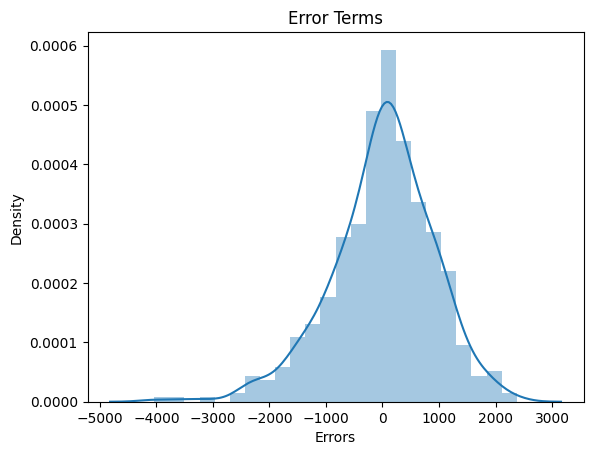

In [231]:
#Plot a histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

#### Errors are normally distributed here with mean 0. So everything seems to be fine Cross-verifying the above conclusion using a qq-plot as well:

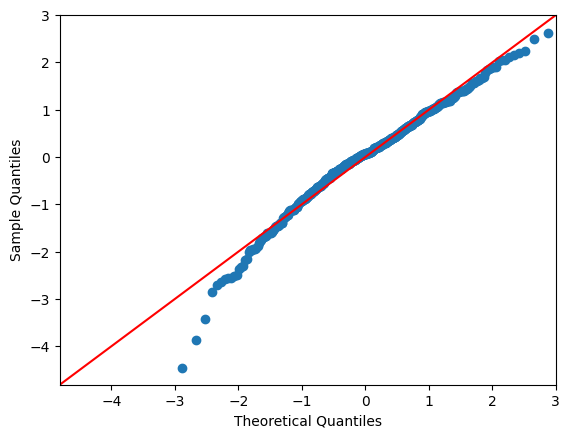

In [232]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

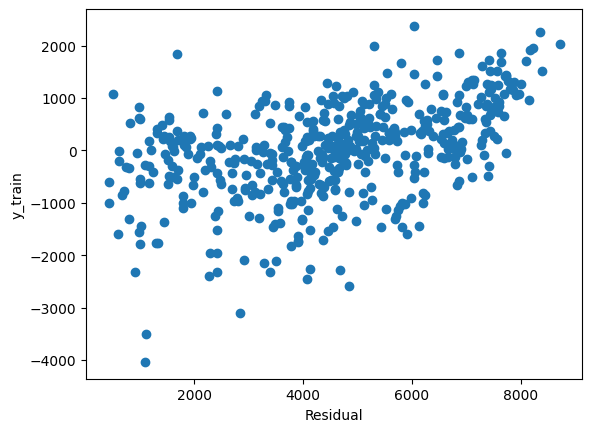

In [233]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

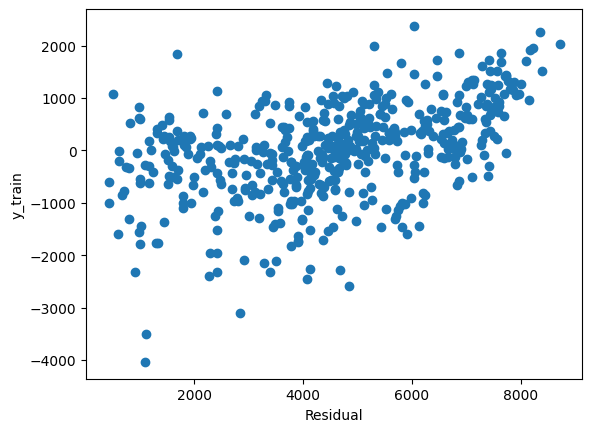

In [234]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [235]:

#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7811647381630689

In [236]:
# Scale variables in X_test
num_vars = ['temp', 'hum', 'windspeed','temp', 'atemp']

X_test[num_vars] = minMaxScaler.transform(X_test[num_vars])

In [237]:
# Predicting test data values
y_test_pred = lr.predict(X_test[cols])

In [238]:
# Checking for r2 score for y_test vs y_test_pred
r2_score(y_test,y_test_pred)

0.7681315610210336

Text(0, 0.5, 'y_test_pred')

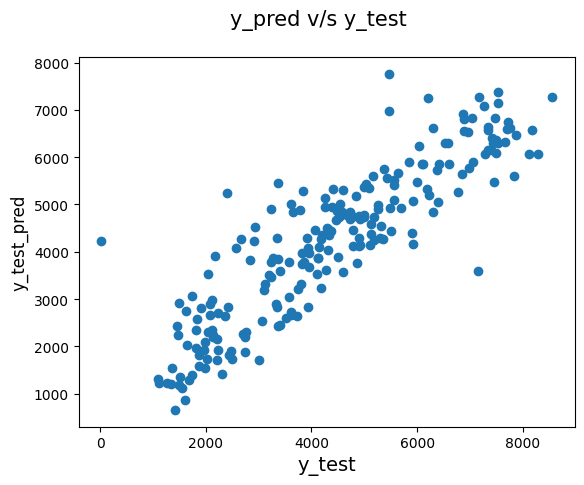

In [239]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_pred v/s y_test', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12) 

##### Variance of the residuals (error terms) seems to be constant across predictions, which are aligning with actual values.

### Conclusions on Final Model:

1. The model can explain more than 77% of bike demand

2. The top 3-4 variables contributing to the demand are -
      - Temperature - Increase in temp, increases the demand of bike rentals.
      - Year - 2019 fared lot better than 2018 and hence increasing in trend
      - Bikes Rentals are more in Holidays than on working days / Non Holidays.
      - Sep Month - The season of Fall, has a better demand than other months.